<a href="https://colab.research.google.com/github/RahulkMathur/Advance_Data_Science_Course-Intellipaat-/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [6]:
#loading datset
df= pd.read_csv("/content/heart.csv")
df
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#Data Exploration
df['target'].value_counts()

,count
target,
1,165
0,138


In [8]:
df.shape

(303, 14)

AttributeError: Rectangle.set() got an unexpected keyword argument 'X'

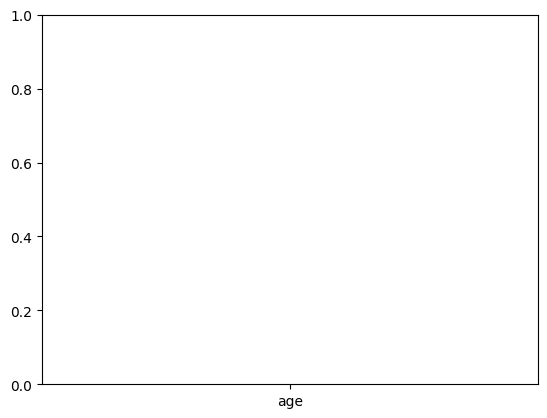

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(X='target', data = df, palette = 'hls')

In [12]:
#Split the data into features (X) and target (y) labels sets

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [13]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [14]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [15]:
#Split the data into a training and test set.
#import module to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
#Create and train the model
#Import module for fitting

from sklearn.linear_model import LogisticRegression

# Create instance  (i.e, object) of logistic Regression

logR = LogisticRegression()
logR.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# Predicting the test set results

y_pred = logR.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [18]:
#Calculationg the Accuracy

print('Accuracy: %d', (logR.score(X_test,y_test)))

Accuracy: %d 0.7704918032786885


In [19]:
#Evaluate model using Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[20 10]
 [ 4 27]]


In [20]:
# interpretations -
# 27 -20 - correctly clasified
# 10 -4  - incorrectly classified

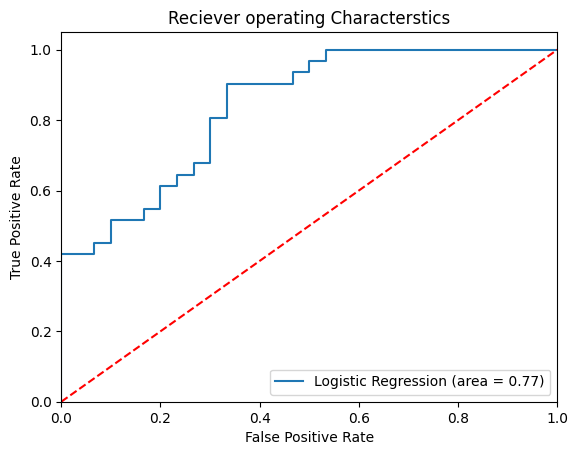

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logR.predict(X_test))
fpr, tpr, threshold = roc_curve(y_test, logR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label = 'Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever operating Characterstics')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()